In [1]:
import traj_dist.distance as tdist #to compile distances
import pyclustering as cl #to cluster the distances
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
import traja as tr #to work with trajectory data
import pandas as pd #to read csv file
import itertools #to compare all trajectories
import numpy as np
from matplotlib import pyplot as plt
import csv
from traja.frame import TrajaCollection #to use all trajectories at once
import seaborn as sns
import geopandas
import geoplot
from shapely.geometry import MultiLineString, LineString, Point, MultiPoint
import datetime

<AxesSubplot:>

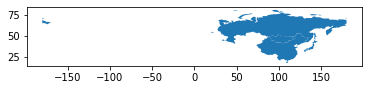

In [2]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
asia = world.cx[90:, 45:]#('continent == "Asia"')
asia.plot()

Read in csv file and vector file

In [3]:
csvfile = "/home/thomas/Documents/Scriptie/t2vec-master/data/asia-trips-resampled-20downsampled.csv"
vectorfile = "/home/thomas/Documents/Scriptie/t2vec-master/experiment/exp2-resampled-r0-trj.t"
labelfile = "/home/thomas/Documents/Scriptie/t2vec-master/experiment/exp2-resampled-r0-trj.label"
x_lat_list = []
y_long_list = []
df = pd.read_csv(csvfile)
x_lat_list = df.lat
y_long_list = df.lon
tripid = df.tripid
print(df)
#iterate = 0
#for i, j in zip(x_lat_list, y_long_list):
#    gdf = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(x=i, y=j))
    
    #gdf = geopandas.GeoDataFrame(geometry=df_First_last.First[cluster]geopandas.points_from_xy(x=df_First_last.First[cluster][0], y=df_First_last.First[cluster][1]))
    
    
    #ax = gdf.plot(figsize=(20, 15), alpha=0.3, edgecolor='k')
    #asia.plot(ax=ax)
#    ax = gdf.plot(figsize=(20, 15), alpha=0.5)#, edgecolor=colour[cluster], color= colour[cluster])
#    figure_name = "RNN_trajs{}.png".format(iterate)
#    geoplot.polyplot(asia, edgecolor='gray', ax=ax)
    #fig = geoplot.polyplot(asia, edgecolor='gray', ax=ax).get_figure()
    #fig.savefig(figure_name)
#df = csv.read(csvfile,copycols=true)
#print(df)

                                               tripid  \
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
3   [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...   
4   [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
..                                                ...   
75  [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...   
76  [76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 7...   
77  [77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...   
78  [78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 7...   
79  [79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 7...   

                                           timestamps  \
0   [1.573023614e9, 1.573034414e9, 1.573045214e9, ...   
1   [1.57294291e9, 1.57295371e9, 1.57296451e9, 1.5...   
2   [1.557093608e9, 1.557104408e9, 1.557115208e9, ...   
3   [1.572994834e9, 1.573005634e9, 1.573016434e9, ...   
4   [1.573023604e9, 1.57303440

Convert string types to float type

In [4]:
list_of_lists = []
new_list = []
long_float = []
lat_float = []
for r in y_long_list:
    r = r[1:len(r)-1]
    long_float.append([float(v) for v in r.split(',')])
    
for r in x_lat_list:
    r = r[1:len(r)-1]
    lat_float.append([float(v) for v in r.split(',')]) 

In [5]:
labels_f = open(labelfile, "r")
vectors_f = open(vectorfile, "r")
labels = labels_f.read().split('\n')
for i in range(len(labels)):
    if(labels[i] != ''):
        labels[i] = int(labels[i])
labels.pop()
vectors = vectors_f.read().split('\n')
vectors.pop()
print(vectors)

['8431 10597 2714 8349 8120 8828 8120 1594 7847 4761 8214 4790 5443 7013 4229 6751 8828 1995 9593 4761 5130 9653 4856 5921 3748 2066 5130 6726 1717 8640 9326 8393 4394 9326 10237 1717 4394 4790 5639 3180 4814 8729 9845 8120 7982 8120 9653 6435 8120 3180 5273 1790 8120 8431 2316 9845 4814 3393 6002 9653 2753 1081 9845 7013 3796 9052 1081 3210 6220 1023 7859 1974 10196 1974 6002 1974 3605 6002 3393 2841 1974 4517 8170 6572 4008 10513 5114 10513 5202 6835 6131 6895 6877 9641 3517 6406 3517 9065 9551 5445 8455 5445 10053 3757 7634 10053 3757 7634 3757 7634 10053 5445 7634 10053 3757 9551 7634 10053 8455 9065 7482 2475 480 5384 1115 502 830 4361 183 6135 5785 502 183 2576 5159 1236 7880 2404 5960 1980 2576 9156 4774 2576 1672 236 4976 8322 3840 6627 915 841 4852 8921 4945 921 7524 1772 4852 3347 101 4852 4389 4678 1208 101 4945 5676 3104 3160 472 1580 472 2952 44 1580 6954 3104 4685 142 3104 367 40 20 5463 236 35 20 8247 44 40 35 40 398 40 44 1253 130 4197 1208 10162 8945 9542 1056 2177 743

Create timestamps from datetime

In [6]:
import ast
timestamps = []
for item in df:
    if (item == "timestamps"):
        for listed_item in df[item]:
            x = ast.literal_eval(listed_item)
            print(x)
            for ts in x:
                timestamps.append(datetime.datetime.fromtimestamp(ts))
            #dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in timestamps]
            #timestamps = []
            timestamps.sort()
            sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in timestamps]
            timestamps = []

[1573023614.0, 1573034414.0, 1573045214.0, 1573056014.0, 1573066814.0, 1573077614.0, 1573088414.0, 1573099214.0, 1573110014.0, 1573120814.0, 1573131614.0, 1573142414.0, 1573153214.0, 1573164014.0, 1573174814.0, 1573185614.0, 1573196414.0, 1573207214.0, 1573218014.0, 1573228814.0, 1573239614.0, 1573250414.0, 1573261214.0, 1573272014.0, 1573282814.0, 1573293614.0, 1573304414.0, 1573315214.0, 1573326014.0, 1573336814.0, 1573347614.0, 1573358414.0, 1573369214.0, 1573380014.0, 1573390814.0, 1573401614.0, 1573412414.0, 1573423214.0, 1573434014.0, 1573444814.0, 1573455614.0, 1573466414.0, 1573477214.0, 1573488014.0, 1573498814.0, 1573509614.0, 1573520414.0, 1573531214.0, 1573542014.0, 1573552814.0, 1573563614.0, 1573574414.0, 1573585214.0, 1573596014.0, 1573606814.0, 1573617614.0, 1573628414.0, 1573639214.0, 1573650014.0, 1573660814.0, 1573671614.0, 1573682414.0, 1573693214.0, 1573704014.0, 1573714814.0, 1573725614.0, 1573736414.0, 1573747214.0, 1573758014.0, 1573768814.0, 1573779614.0, 15737

[1422766800.0, 1422777600.0, 1422788400.0, 1422799200.0, 1422810000.0, 1422820800.0, 1422831600.0, 1422842400.0, 1422853200.0, 1422864000.0, 1422874800.0, 1422885600.0, 1422896400.0, 1422907200.0, 1422918000.0, 1422928800.0, 1422939600.0, 1422950400.0, 1422961200.0, 1422972000.0, 1422982800.0, 1422993600.0, 1423004400.0, 1423015200.0, 1423026000.0, 1423036800.0, 1423047600.0, 1423058400.0, 1423069200.0, 1423080000.0, 1423090800.0, 1423101600.0, 1423112400.0, 1423123200.0, 1423134000.0, 1423144800.0, 1423155600.0, 1423166400.0, 1423177200.0, 1423188000.0, 1423198800.0, 1423209600.0, 1423220400.0, 1423231200.0, 1423242000.0, 1423252800.0, 1423263600.0, 1423274400.0, 1423285200.0, 1423296000.0, 1423306800.0, 1423317600.0, 1423328400.0, 1423339200.0, 1423350000.0, 1423360800.0, 1423371600.0, 1423382400.0, 1423393200.0, 1423404000.0, 1423414800.0, 1423425600.0, 1423436400.0, 1423447200.0, 1423458000.0, 1423468800.0, 1423479600.0, 1423490400.0, 1423501200.0, 1423512000.0, 1423522800.0, 14235

[1450076400.0, 1450087200.0, 1450098000.0, 1450108800.0, 1450119600.0, 1450130400.0, 1450141200.0, 1450152000.0, 1450162800.0, 1450173600.0, 1450184400.0, 1450195200.0, 1450206000.0, 1450216800.0, 1450227600.0, 1450238400.0, 1450249200.0, 1450260000.0, 1450270800.0, 1450281600.0, 1450292400.0, 1450303200.0, 1450314000.0, 1450324800.0, 1450335600.0, 1450346400.0, 1450357200.0, 1450368000.0, 1450378800.0, 1450389600.0, 1450400400.0, 1450411200.0, 1450422000.0, 1450432800.0, 1450443600.0, 1450454400.0, 1450465200.0, 1450476000.0, 1450486800.0, 1450497600.0, 1450508400.0, 1450519200.0, 1450530000.0, 1450540800.0, 1450551600.0, 1450562400.0, 1450573200.0, 1450584000.0, 1450594800.0, 1450605600.0, 1450616400.0, 1450627200.0, 1450638000.0, 1450648800.0, 1450659600.0, 1450670400.0, 1450681200.0, 1450692000.0, 1450702800.0, 1450713600.0, 1450724400.0, 1450735200.0, 1450746000.0, 1450756800.0, 1450767600.0, 1450778400.0, 1450789200.0, 1450800000.0, 1450810800.0, 1450821600.0, 1450832400.0, 14508

[1514800860.0, 1514811660.0, 1514822460.0, 1514833260.0, 1514844060.0, 1514854860.0, 1514865660.0, 1514876460.0, 1514887260.0, 1514898060.0, 1514908860.0, 1514919660.0, 1514930460.0, 1514941260.0, 1514952060.0, 1514962860.0, 1514973660.0, 1514984460.0, 1514995260.0, 1515006060.0, 1515016860.0, 1515027660.0, 1515038460.0, 1515049260.0, 1515060060.0, 1515070860.0, 1515081660.0, 1515092460.0, 1515103260.0, 1515114060.0, 1515124860.0, 1515135660.0, 1515146460.0, 1515157260.0, 1515168060.0, 1515178860.0, 1515189660.0, 1515200460.0, 1515211260.0, 1515222060.0, 1515232860.0, 1515243660.0, 1515254460.0, 1515265260.0, 1515276060.0, 1515286860.0, 1515297660.0, 1515308460.0, 1515319260.0, 1515330060.0, 1515340860.0, 1515351660.0, 1515362460.0, 1515373260.0, 1515384060.0, 1515394860.0, 1515405660.0, 1515416460.0, 1515427260.0, 1515438060.0, 1515448860.0, 1515459660.0, 1515470460.0, 1515481260.0, 1515492060.0, 1515502860.0, 1515513660.0, 1515524460.0, 1515535260.0, 1515546060.0, 1515556860.0, 15155

[1510837200.0, 1510848000.0, 1510858800.0, 1510869600.0, 1510880400.0, 1510891200.0, 1510902000.0, 1510912800.0, 1510923600.0, 1510934400.0, 1510945200.0, 1510956000.0, 1510966800.0, 1510977600.0, 1510988400.0, 1510999200.0, 1511010000.0, 1511020800.0, 1511031600.0, 1511042400.0, 1511053200.0, 1511064000.0, 1511074800.0, 1511085600.0, 1511096400.0, 1511107200.0, 1511118000.0, 1511128800.0, 1511139600.0, 1511150400.0, 1511161200.0, 1511172000.0, 1511182800.0, 1511193600.0, 1511204400.0, 1511215200.0, 1511226000.0, 1511236800.0, 1511247600.0, 1511258400.0, 1511269200.0, 1511280000.0, 1511290800.0, 1511301600.0, 1511312400.0, 1511323200.0, 1511334000.0, 1511344800.0, 1511355600.0, 1511366400.0, 1511377200.0, 1511388000.0, 1511398800.0, 1511409600.0, 1511420400.0, 1511431200.0, 1511442000.0, 1511452800.0, 1511463600.0, 1511474400.0, 1511485200.0, 1511496000.0, 1511506800.0, 1511517600.0, 1511528400.0, 1511539200.0, 1511550000.0, 1511560800.0, 1511571600.0, 1511582400.0, 1511593200.0, 15116

[1510977600.0, 1510988400.0, 1510999200.0, 1511010000.0, 1511020800.0, 1511031600.0, 1511042400.0, 1511053200.0, 1511064000.0, 1511074800.0, 1511085600.0, 1511096400.0, 1511107200.0, 1511118000.0, 1511128800.0, 1511139600.0, 1511150400.0, 1511161200.0, 1511172000.0, 1511182800.0, 1511193600.0, 1511204400.0, 1511215200.0, 1511226000.0, 1511236800.0, 1511247600.0, 1511258400.0, 1511269200.0, 1511280000.0, 1511290800.0, 1511301600.0, 1511312400.0, 1511323200.0, 1511334000.0, 1511344800.0, 1511355600.0, 1511366400.0, 1511377200.0, 1511388000.0, 1511398800.0, 1511409600.0, 1511420400.0, 1511431200.0, 1511442000.0, 1511452800.0, 1511463600.0, 1511474400.0, 1511485200.0, 1511496000.0, 1511506800.0, 1511517600.0, 1511528400.0, 1511539200.0, 1511550000.0, 1511560800.0, 1511571600.0, 1511582400.0, 1511593200.0, 1511604000.0, 1511614800.0, 1511625600.0, 1511636400.0, 1511647200.0, 1511658000.0, 1511668800.0, 1511679600.0, 1511690400.0, 1511701200.0, 1511712000.0, 1511722800.0, 1511733600.0, 15117

[1510999200.0, 1511010000.0, 1511020800.0, 1511031600.0, 1511042400.0, 1511053200.0, 1511064000.0, 1511074800.0, 1511085600.0, 1511096400.0, 1511107200.0, 1511118000.0, 1511128800.0, 1511139600.0, 1511150400.0, 1511161200.0, 1511172000.0, 1511182800.0, 1511193600.0, 1511204400.0, 1511215200.0, 1511226000.0, 1511236800.0, 1511247600.0, 1511258400.0, 1511269200.0, 1511280000.0, 1511290800.0, 1511301600.0, 1511312400.0, 1511323200.0, 1511334000.0, 1511344800.0, 1511355600.0, 1511366400.0, 1511377200.0, 1511388000.0, 1511398800.0, 1511409600.0, 1511420400.0, 1511431200.0, 1511442000.0, 1511452800.0, 1511463600.0, 1511474400.0, 1511485200.0, 1511496000.0, 1511506800.0, 1511517600.0, 1511528400.0, 1511539200.0, 1511550000.0, 1511560800.0, 1511571600.0, 1511582400.0, 1511593200.0, 1511604000.0, 1511614800.0, 1511625600.0, 1511636400.0, 1511647200.0, 1511658000.0, 1511668800.0, 1511679600.0, 1511690400.0, 1511701200.0, 1511712000.0, 1511722800.0, 1511733600.0, 1511744400.0, 1511755200.0, 15117

In [7]:
combined_df = pd.DataFrame(columns=['traj_id','vector_id','latitudes','longitudes','vector_rep'])
combined_df

,traj_id,vector_id,latitudes,longitudes,vector_rep


In [8]:
combined_df["traj_id"] = tripid
combined_df["latitudes"] = lat_float
combined_df["longitudes"] = long_float
combined_df

,traj_id,vector_id,latitudes,longitudes,vector_rep
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,"[29.1557193, 29.1557988, 29.106823, 29.118821,...","[116.2346306, 116.2347071, 116.2042928, 116.23...",NaN
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,"[28.932817600000003, 28.932787800000003, 28.93...","[116.3759202, 116.3759417, 116.3758921, 116.37...",NaN
2,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",NaN,"[43.30617279999999, 43.3061671, 43.3061888, 43...","[120.6246698, 120.6246593, 120.6246847, 120.62...",NaN
3,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",NaN,"[30.2980495, 30.2980221, 30.3080423, 30.307979...","[117.0073308, 117.007253, 117.00397759999998, ...",NaN
4,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",NaN,"[29.137355100000004, 29.1174398, 29.1182783, 2...","[116.049729, 116.041403, 116.0425442, 116.0436...",NaN
...,...,...,...,...,...
75,"[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...",NaN,"[29.12642, 29.16038, 29.11781, 29.11641, 29.11...","[116.1038, 116.11182, 116.11991, 116.13042, 11...",NaN
76,"[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 7...",NaN,"[29.08501, 29.1232, 29.123240000000006, 29.120...","[116.1647, 116.15298, 116.15299, 116.1529, 116...",NaN
77,"[77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...",NaN,"[29.09862, 29.09869, 29.098740000000006, 29.10...","[116.15764, 116.15749, 116.15748, 116.15247, 1...",NaN
78,"[78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 7...",NaN,"[29.09931, 29.099120000000006, 29.096190000000...","[116.15766, 116.15767, 116.1587, 116.14987, 11...",NaN


In [9]:
for index in range(len(vectors)):
    print(labels[index])
    combined_df.loc[labels[index]-1, 'vector_id'] = labels[index]
    combined_df.loc[labels[index]-1, 'vector_rep'] = vectors[index]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
20
21
22
23
24
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
67
68


In [34]:
combined_df.to_csv('combined_exp2_r0-resampled_20downsampled.csv')